In [17]:
from PIL import Image
import numpy as np
import imageio
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, models, transforms

In [18]:
# Create NN model locally to test to make sure it runs not on GPU!

device = torch.device('cpu')



model = models.resnet50(pretrained=False).to(device)
model.fc = nn.Sequential(
    nn.Linear(2048, 128),
    nn.ReLU(inplace=True),
    nn.Linear(128, 2)).to(device)
model.load_state_dict(torch.load('app/models/cva_weights_second_model.h5', map_location='cpu'))
model.eval()



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [19]:
# Include information for transforming data, train probably not necessary
data_transforms = {
    'train':
        transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()]),
    'validation':
        transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])}



In [24]:
# Images to get prediction on
validation_img_paths = ["test_images/DSC_2091.JPG",
                       "test_images/20180921_184254.jpg",
                       "test_images/IMG_1283.JPG",
                       "test_images/IMG_20181225_143355_306.jpg"]
#                        "test_images/IMG_20181225_143355_306.jpg"]
img_list = [Image.open(img_path) for img_path in validation_img_paths]

In [25]:
# Get probabilities

validation_batch = torch.stack([data_transforms['validation'](img).to(device)
                                for img in img_list])
 
pred_logits_tensor = model(validation_batch)
pred_probs = F.softmax(pred_logits_tensor, dim=1).cpu().data.numpy()

[[0.00674402 0.993256  ]
 [0.04323401 0.95676595]
 [0.5710685  0.4289315 ]
 [0.6372017  0.36279827]]


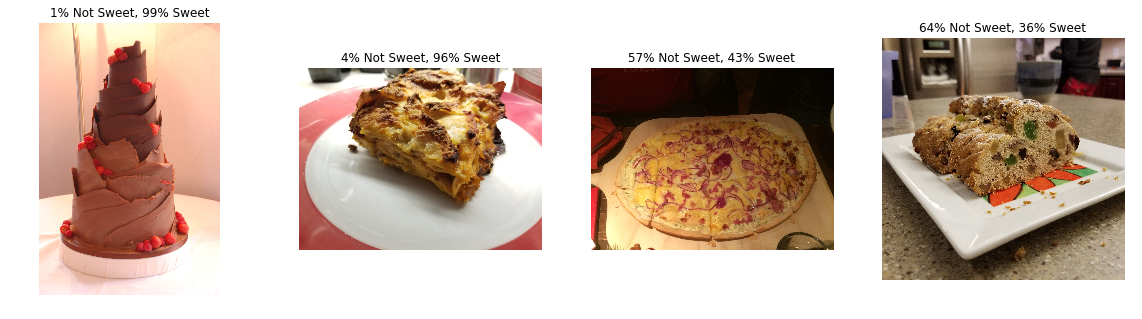

In [26]:
# Plot pimages and probabilities

fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% Not Sweet, {:.0f}% Sweet".format(100*pred_probs[i,0],
                                                          100*pred_probs[i,1]))
    ax.imshow(img)
print(pred_probs)

In [23]:
print(pred_probs[0][0], pred_probs[0][1])

0.006744012 0.993256
